In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family']=' Times New Roman, SimSun'# 设置字体族，中文为SimSun，英文为Times New Roman
plt.rcParams['mathtext.fontset'] = 'stix' # 设置数学公式字体为stix
plt.rcParams['font.size'] = 11  # 设置全局字体大小

import warnings
# 禁用所有警告
warnings.filterwarnings("ignore")

In [2]:
### 以asthma为例，根据核心基因是否可以区分性状相关组织和不相关组织
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx", sheet_name="corelcczscore-tissue")
results_sorted = results.sort_values(by = "fisher's pvalue") #按照与性状的相关性排序
tissuelist = list(results_sorted["tissue"])

## 把所有组织核心基因的pvalue组合到一个表
all_df = pd.DataFrame()
for tissue in tissuelist:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv" % tissue)
    df_sorted = df.sort_values("Column")
    all_df[tissue] = df_sorted["P-Value"]
all_df.index = df_sorted["Column"]

AttributeError: 'ClusterGrid' object has no attribute 'collections'

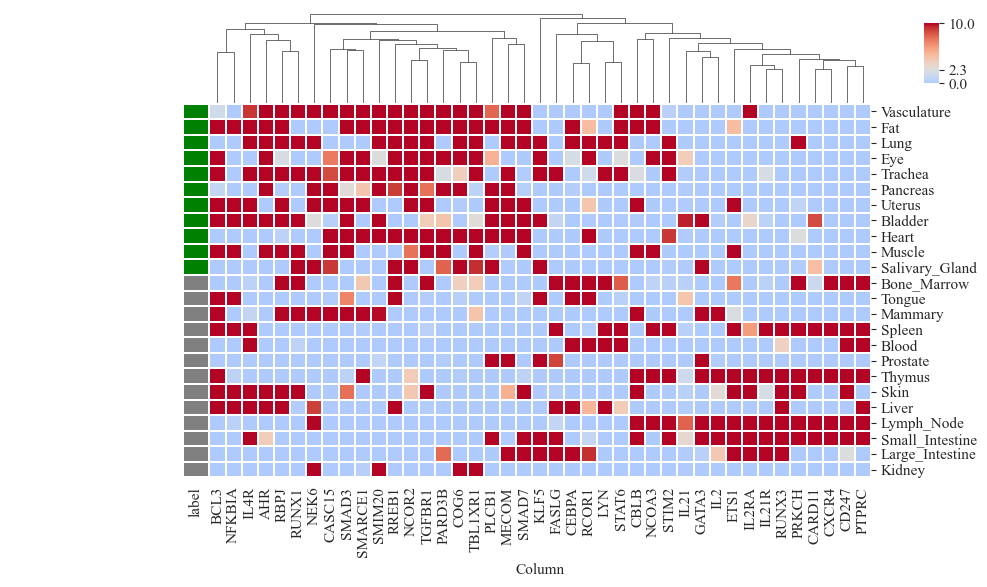

In [9]:
import seaborn as sns
# 绘制热力图
epsilon = 1e-10
x = -np.log10(0.005 + epsilon)
#左侧颜色条
alldf_T = all_df.T

alldf_T["label"] = np.where(results["fisher's pvalue"] > 0.005, 0, 1)
row_c = dict(zip(alldf_T['label'].unique(), ['green','grey']))
# alldf_T.index = ["脉管","脂肪","肺","眼睛","气管","胰腺","子宫","膀胱","心",
#                      "肌肉","唾液腺","骨髓","舌头","乳房","脾","血液","前列腺","胸腺",
#                      "皮肤","肝脏","淋巴结","小肠","大肠","肾脏"]
g = sns.clustermap(-np.log10(alldf_T.iloc[:,:-1] + epsilon), cmap="coolwarm", figsize=(10, 6),
               method='average',
               metric='euclidean',
               row_cluster=False, col_cluster=True,
               xticklabels=True, yticklabels=True,
               cbar_pos=(0.93, 0.85, 0.015, 0.1),
               row_colors=alldf_T["label"].map(row_c), #行方向聚类用颜色区分不同类 
               cbar_kws={'ticks': [0, x, 10]},
               center=x, linewidths=0.05)
# 设置 colorbar 的标签
g.cax.set_label("GS", fontsize=11,  labelpad=10)

g.ax_heatmap.set_xlabel("Gene")  # 设置横轴标签
g.ax_heatmap.set_ylabel("Trait")  # 设置纵轴标签

g.savefig(r"E:\00_CeSOP\plot\figures-en\25-en.png",dpi=500) # 正确方法：通过图的 colorbar 对象来操作


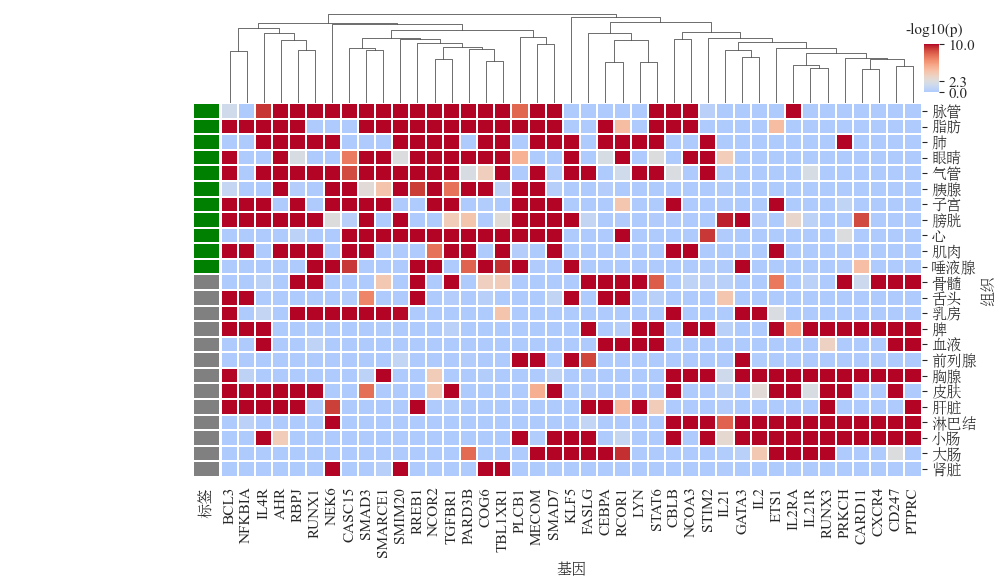

In [13]:
import seaborn as sns
# 绘制热力图
epsilon = 1e-10
x = -np.log10(0.005 + epsilon)
#左侧颜色条
alldf_T = all_df.T

alldf_T["标签"] = np.where(results["fisher's pvalue"] > 0.005, 0, 1)
row_c = dict(zip(alldf_T['标签'].unique(), ['green','grey']))
alldf_T.index = ["脉管","脂肪","肺","眼睛","气管","胰腺","子宫","膀胱","心",
                     "肌肉","唾液腺","骨髓","舌头","乳房","脾","血液","前列腺","胸腺",
                     "皮肤","肝脏","淋巴结","小肠","大肠","肾脏"]
ax = sns.clustermap(-np.log10(alldf_T.iloc[:,:-1] + epsilon), cmap="coolwarm", figsize=(10, 6),
               method='average',
               metric='euclidean',
               row_cluster=False, col_cluster=True,
               xticklabels=True, yticklabels=True,
               cbar_pos=(0.93, 0.835, 0.015, 0.08),
               row_colors=alldf_T["标签"].map(row_c), #行方向聚类用颜色区分不同类 
               cbar_kws={'ticks': [0, x, 10]},
               center=x, linewidths=0.2)
# 设置横轴和纵轴的标签
ax.ax_heatmap.set_xlabel("基因")  # 设置横轴标签
ax.ax_heatmap.set_ylabel("组织")  # 设置纵轴标签

# 获取 colorbar 对象
cbar = ax.cax
# 调整标签显示在上方
cbar.yaxis.set_label_position('left') 
cbar.yaxis.set_ticks_position('right')  # 设置 ticks 在上方

# 关键步骤！强制把标签移动到色条顶端 (1.05表示稍微在顶端外侧)
cbar.set_ylabel("-log10(p)", rotation=0, labelpad=10)
cbar.yaxis.set_label_coords(0.7, 1.15)  # 横向 1.4，纵向 1.02 (微调看效果)


# 设置 colorbar 的标签
# ax.ax_cbar.set_xlabel("-log10(p)", fontsize=11)  # 设置颜色条的标签
# 设置 colorbar 的刻度标签
# g.ax_cbar.set_yticklabels(["0", "-log10(0.005)", "10"])  # 替换颜色条的数值标签
# 保存图片到文件
ax.savefig(r"E:\00_CeSOP\plot\figures-zh\25.png",dpi=1000) 

In [2]:
### 以asthma为例，根据核心基因是否可以区分性状相关组织和不相关组织
import os
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="corelcczscore-tissue")
# pvalue小于0.005的细胞类型
results_related = results[results["fisher's pvalue"]<=0.005]
yes_tissue = list(results_related["tissue"])
no_tissue = list(set(results["tissue"]) - set(yes_tissue))

## 把所有组织核心基因的pvalue组合到一个表
all_df = pd.DataFrame()
tissuelist = os.listdir(r"E:\0_单细胞1\results\lcczscore-pip")
for tissue in tissuelist:
    # df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues only expressed\core\%s.csv"%tissue)
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv"%tissue)
    df_sorted = df.sort_values("Column")
    all_df[tissue] = df_sorted["P-Value"]
all_df.index = df_sorted["Column"]

In [4]:
'''提取聚类结果----基因'''
epsilon = 1e-10
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
# 计算余弦距离矩阵
cosine_distance = pdist(-np.log10(all_df + epsilon),metric='euclidean')  # Transpose to calculate column distances
# 生成层次聚类
linkage_matrix = sch.linkage(cosine_distance,method='average')
# 划分簇，设置簇数为3
cluster_assignments = sch.fcluster(linkage_matrix, t=2, criterion='maxclust')
# 添加簇分配结果到 DataFrame
all_df['Cluster'] = cluster_assignments

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


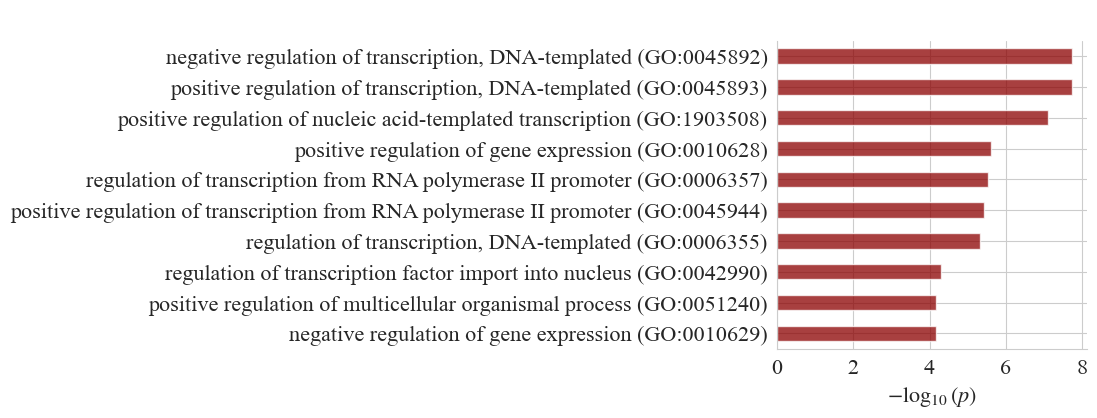

In [10]:
import gseapy as gp

# 读取基因列表
genelist = list(all_df[(all_df["Cluster"] == 1)].index)
# GO富集分析，pdf结果会自动保存到GO_BP_enrichr下
result_go = gp.enrichr(gene_list=genelist,
                       organism='human',
                       gene_sets='GO_Biological_Process_2018',
                       # description='test', 
                       outdir=r"GO_BP_enrichr")

## 画图
from gseapy import barplot, dotplot

ax = barplot(result_go.res2d, title=' ', figsize=(4, 4), color='darkred')
plt.xlabel(r'$-\log_{10}(p)$')  # LaTeX 格式
plt.tight_layout(pad=1.5)
plt.savefig(r"E:\00_CeSOP\plot\figures-en\27-intissues.png", dpi=1000, bbox_inches='tight')
plt.show()

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


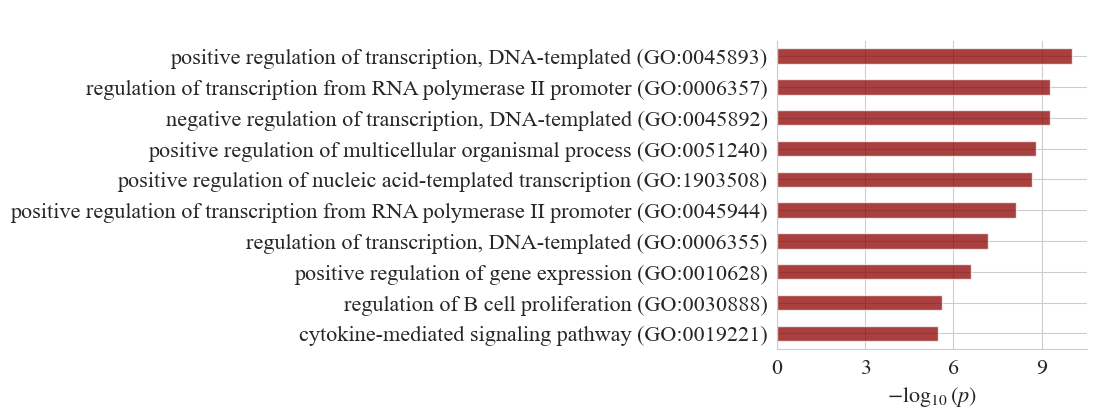

In [8]:
import gseapy as gp

# 读取基因列表
genelist = list(all_df.index)
# GO富集分析，pdf结果会自动保存到GO_BP_enrichr下
result_go = gp.enrichr(gene_list=genelist, 
                        organism='human', 
                        gene_sets='GO_Biological_Process_2018', 
                        # description='test', 
                        outdir=r"GO_BP_enrichr")

## 画图
from gseapy import barplot, dotplot
ax = barplot(result_go.res2d,title=' ', figsize=(4, 4), color='darkred')
plt.xlabel(r'$-\log_{10}(p)$')  # LaTeX 格式
plt.tight_layout(pad=1.5)
plt.savefig(r"E:\00_CeSOP\plot\figures-en\27-asthma.png",dpi=1000, bbox_inches='tight') 
plt.show()

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


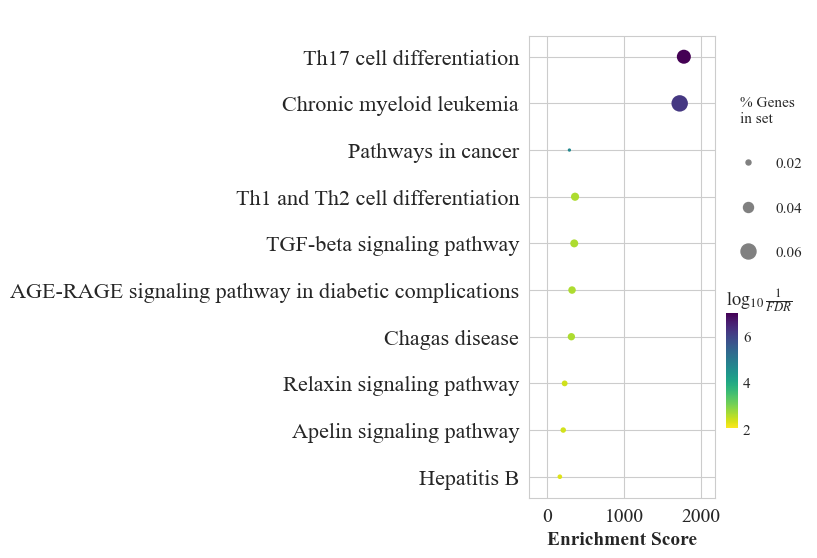

In [9]:
import gseapy as gp

# 读取基因列表
genelist = list(all_df[(all_df["Cluster"]==1)].index)
# KEGG富集分析，pdf结果会自动保存到 KEGG_enrichr 目录下
result_kegg = gp.enrichr(gene_list=genelist, 
                          organism='human', 
                          gene_sets='KEGG_2021_Human', 
                        #   description='test', 
                          outdir=r"KEGG_enrichr")

## 画图
from gseapy import barplot, dotplot
# ax1 = dotplot(result_kegg.res2d,title=' ', figsize=(3,4.5), color='darkred',size = 30,fontsize = 11)
ax1 = dotplot(result_kegg.res2d,title=' ', figsize=(3,6), color='darkred',size = 30,fontsize = 11)
# 自定义图例位置（右侧外部）
# ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel(r'Enrichment Score')  # LaTeX 格式
plt.tight_layout(pad=1.5)
plt.savefig(r"E:\00_CeSOP\plot\figures-en\28-intissues.png",dpi=1000, bbox_inches='tight') 
plt.show()

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


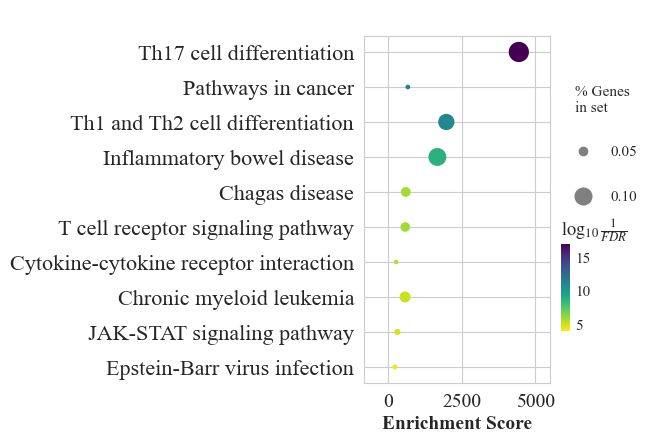

In [11]:

import gseapy as gp

# 读取基因列表
genelist = list(all_df.index)
# 
# KEGG富集分析，pdf结果会自动保存到 KEGG_enrichr 目录下
result_kegg = gp.enrichr(gene_list=genelist, 
                          organism='human', 
                          gene_sets='KEGG_2021_Human', 
                        #   description='test', 
                          outdir=r"KEGG_enrichr")

## 画图
from gseapy import barplot, dotplot
from gseapy import barplot, dotplot
ax1 = dotplot(result_kegg.res2d,title=' ', figsize=(3, 4.5), color='darkred',size = 20)
plt.xlabel(r'Enrichment Score')  # LaTeX 格式
plt.tight_layout(pad=1.5)
plt.savefig(r"E:\00_CeSOP\plot\figures-en\28-asthma.png",dpi=1000, bbox_inches='tight') 
plt.show()

In [12]:
import networkx as nx
'''读取背景网络'''
def openPPI(filename):
    '''
        打开PPI
        文件格式 gene1_name gene1_id gene2_name gene2_id
        返回值：网络[节点是gene name]
    '''
    G = nx.Graph()
    a=open(filename,"r")
    next(a)

    for i in a:
        n=i.strip().split("\t")
        G.add_edge(n[0],n[3])
        G.add_node(n[0])
        G.add_node(n[3])
    a.close()
    return G

G = openPPI(r"E:\00_CeSOP\data\network(process_id).txt")

In [13]:
# 计算最大连通分支
def Lcc(G,genename):
    '''
        输入图网络和一个列表，计算最大连通分支lcc
        G：图，这里图中的节点是基因name
        genename：用于计算lcc的genename列表
    '''

    g = nx.subgraph(G,genename)
    if len(genename)==0:
        largest = 0
        l = []
        return l,largest
    else:
        try:
            l = max(nx.connected_components(g),key=len)  #如果随机选取的gene没有连通分支的话，会报错，添加判断条件
            largest = len(l)     #最大联通分支
        except ValueError as e:
            l = genename[0]    # 假设genename列表中的第一个基因为最大连通分支
            largest = 1        #设置最大联通分支数为1
        return list(l),largest

In [14]:
import scanpy as sc
# 计算初始最大连通分支的大小
def max_connected_component_size(graph):
    return max(len(c) for c in nx.connected_components(graph))
# 计算节点重要性
def nodeImportance(G):
    '''
    如果一个节点的删除导致了连通分支（或连通组件）的显著分裂，那么这个节点可以被视为一个关键节点或割点（articulation point）
    :param G:
    :return: 节点重要性字典
    '''
    original_max_size = max_connected_component_size(G)
    # 计算节点的重要程度
    node_importance = {}
    for node in list(G.nodes()):
        H = G.copy()
        H.remove_node(node)
        new_max_size = max_connected_component_size(H)
        node_importance[node] = original_max_size - new_max_size
    return node_importance

# 读取asthma gwas数据中所有基因、核心。外围
trait = pd.read_csv(r"E:\0_单细胞1\data\poly_posterior_prior_gene_new\29_new.txt",sep = "\t")
trait_coregene = list(pd.read_csv(r"E:\0_单细胞1\data\gene set\29_coregene.txt",sep = "\t",header= None)[0])
trait_core = trait[trait["gene name"].isin(trait_coregene)]

# 读取TS FACS单细胞数据
annData = sc.read_h5ad(r"E:\0_单细胞1\data\TS_FACS\TS_Liver.h5ad")
sc_gene = list(annData.var.index)

##  连通分支（核心）的子图
l_connected_core,lcc = Lcc(G,trait_coregene)
g1 = nx.subgraph(G,l_connected_core)
## 单细胞数据中的核心基因
sc_asthma_coregene = list(set(sc_gene) & set(l_connected_core))
g2 = nx.subgraph(G,sc_asthma_coregene)
# 网络拓扑上的节点重要性
node_importance = nodeImportance(g2)
# node_importance.to_csv(r"E:\0_单细胞1\results\importance of nodes in network\core_asthma.txt")

# 将节点拓扑重要性归一化
# 提取字典中的值并计算最小值和最大值

values = list(node_importance.values())
min_value = min(values)
max_value = max(values)
# 选择一个小的epsilon，保证归一化值不为0或1
epsilon = 0.0001
# 使用最小-最大归一化公式对字典的值进行归一化
node_importance_norm = {key: ((value - min_value) / (max_value - min_value) * (1 - 2 * epsilon) + epsilon)
                        for key, value in node_importance.items()}
# 按键排序
node_importance_norm_sorted = {key: node_importance_norm[key] for key in sorted(node_importance_norm)}
print("原始数据:", node_importance)
print("归一化后的数据:", node_importance_norm_sorted)

原始数据: {'NFKBIA': 1, 'SMARCE1': 3, 'CD247': 1, 'RUNX3': 1, 'ETS1': 19, 'CASC15': 1, 'SMAD3': 8, 'IL4R': 1, 'IL2': 1, 'AHR': 1, 'MECOM': 1, 'STAT6': 17, 'FASLG': 1, 'PARD3B': 1, 'SMAD7': 1, 'CARD11': 1, 'LYN': 4, 'TGFBR1': 3, 'NCOR2': 3, 'KLF5': 2, 'CEBPA': 1, 'RREB1': 1, 'PTPRC': 3, 'BCL3': 1, 'GATA3': 1, 'RBPJ': 3, 'IL21R': 2, 'IL21': 1, 'RUNX1': 1, 'RCOR1': 2, 'STIM2': 1, 'CBLB': 2, 'NCOA3': 4, 'CXCR4': 1, 'PRKCH': 11, 'TBL1XR1': 1, 'PLCB1': 1, 'COG6': 1, 'NEK6': 2, 'SMIM20': 1, 'IL2RA': 12}
归一化后的数据: {'AHR': 0.0001, 'BCL3': 0.0001, 'CARD11': 0.0001, 'CASC15': 0.0001, 'CBLB': 0.05564444444444445, 'CD247': 0.0001, 'CEBPA': 0.0001, 'COG6': 0.0001, 'CXCR4': 0.0001, 'ETS1': 0.9999, 'FASLG': 0.0001, 'GATA3': 0.0001, 'IL2': 0.0001, 'IL21': 0.0001, 'IL21R': 0.05564444444444445, 'IL2RA': 0.6110888888888889, 'IL4R': 0.0001, 'KLF5': 0.05564444444444445, 'LYN': 0.16673333333333332, 'MECOM': 0.0001, 'NCOA3': 0.16673333333333332, 'NCOR2': 0.11118888888888889, 'NEK6': 0.05564444444444445, 'NFKBIA': 

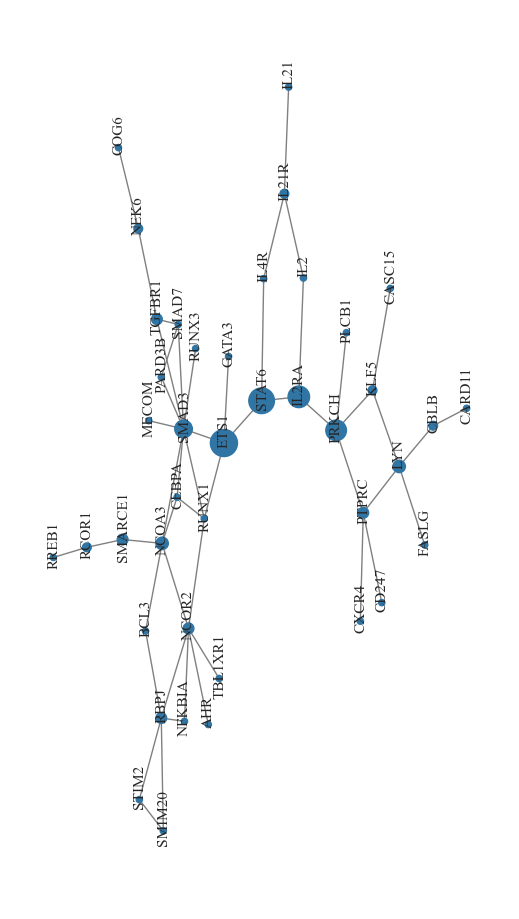

In [15]:

## 可视化最大连通分支,节点大小表示度中心性
def viewNx1(g):
    '''

    :param g: 子图
    :param flag: 核心还是外围
    :return: 可视化结果
    '''

    node_importance = nodeImportance(g)
    # 根据重要程度设置节点大小
    node_sizes = [node_importance[node] * 20 for node in g.nodes()]

    # 连通分支（核心）的子图可视化
    options = {
        'node_color': '#3175A4',
        # 'width': 2,
        'font_size': 11,
        'font_color': 'black',
        # 设置边的属性
        'edge_color' :'grey',
        }
    # 使用Kamada-Kawai布局算法
    pos = nx.kamada_kawai_layout(g)
    # pos = nx.nx_agraph.graphviz_layout(g, prog='dot')  # 'dot' 生成横向布局
    # pos = nx.spring_layout(g, k=5, seed=42)  # 增大 k 值，使其横向展开
    plt.figure(figsize=(5, 9))  # 增加图形大小以减少重叠
    # 绘制节点和边
    # nx.draw_networkx(
    #     g,pos,node_size=node_sizes,**options)
    nx.draw(g, pos, node_size=node_sizes, node_color='#3175A4', edge_color='grey')
    # node_num = len(g.nodes)
    # plt.title(f"Core Lcc of Asthma in SingleCell (Nodes:{node_num})")
    plt.grid(False)
        # 旋转所有标签
    for node, (x, y) in pos.items():
        plt.text(x, y + 0.02, node, fontsize=11, ha='center', va='center', rotation=90)
    plt.savefig(r"E:\00_CeSOP\plot\figures-en\26.png",dpi=1000)     
    plt.show()

# viewNx1(g1)
viewNx1(g2)

In [27]:
'''读取背景网络'''
def openPPI(filename):
    '''
        打开PPI
        文件格式 gene1_name gene1_id gene2_name gene2_id
        返回值：网络[节点是gene name]
    '''
    G = nx.Graph()
    a=open(filename,"r")
    next(a)

    for i in a:
        n=i.strip().split("\t")
        G.add_edge(n[0],n[3])
        G.add_node(n[0])
        G.add_node(n[3])
    a.close()
    return G

G = openPPI(r"E:\00_CeSOP\data\network(process_id).txt")

In [28]:
# 计算最大连通分支
def Lcc(G,nodes):
    '''
        输入图网络和一个列表，计算最大连通分支lcc
        如果空节点集合，返回0；子图不联通，返回1；否则返回最大连通分支
        G：图，这里图中的节点是基因name
        genename：用于计算lcc的genename列表
    '''

    g = nx.subgraph(G,nodes)
    if len(nodes)==0:
        largest = 0
    else:
        try:
            l = max(nx.connected_components(g),key=len)  #如果随机选取的gene没有连通分支的话，会报错，添加判断条件
            largest = len(l)     #最大联通分支
        except ValueError as e:
            l = nodes[0]    # 假设genename列表中的第一个基因为最大连通分支
            largest = 1        #设置最大联通分支数为1
    return largest

In [29]:
# 计算节点重要性
def nodeImportance(G,nodes):
    '''
    如果一个节点的删除导致了连通分支（或连通组件）的显著分裂，那么这个节点可以被视为一个关键节点或割点（articulation point）
    :param G:
    :return: 节点重要性字典
    '''
    
    original_max_size = Lcc(G,nodes)
    # 计算节点的重要程度
    node_importance = {}
    for node in nodes:
        # 删除节点后，重新计算lcc
        # 使用列表推导式创建新列表，不包含要移除的元素
        new_nodes = [element for element in nodes if element != node]
        new_max_size = Lcc(G,new_nodes)
        node_importance[node] = original_max_size - new_max_size
    return node_importance

In [30]:
## 可视化最大连通分支,节点大小表示度中心性
def viewNx1(nodes,title):
    '''

    :param g: 子图
    :param flag: 核心还是外围
    :return: 可视化结果
    '''

    node_importance = nodeImportance(G,nodes)
    g = nx.subgraph(G,nodes)

    # 连通分支（核心）的子图可视化
    options = {
        'node_color': 'skyblue',
        'node_size' : 50,
        # 'width': 2,
        'font_size': 8,
        'font_color': 'black',
        # 设置边的属性
        'edge_color' :'grey',
        }
    # 使用Kamada-Kawai布局算法
    pos = nx.kamada_kawai_layout(g)
    plt.figure(figsize=(2,2),dpi = 150)  # 增加图形大小以减少重叠
    # # 绘制节点和边
    # nx.draw_networkx(
    #     g,pos,**options)
    nx.draw(g, pos, node_size=20,node_color='#3175A4', edge_color='grey')
        # 绘制节点和边
    # nx.draw_networkx(g, pos, **options)
    # for node, (x, y) in pos.items():
    #     plt.text(x, y + 0.02, node, fontsize=8, ha='center', va='center', rotation=90)

    # plt.title(title)
    plt.grid(False)
    
    plt.savefig(r"E:\00_CeSOP\plot\figures\29_%s.png"%title,dpi=1000)     
    # plt.show()

Vasculature
Fat
Lung
Eye
Trachea
Pancreas
Uterus
Bladder
Heart
Muscle
Salivary_Gland
Bone_Marrow
Tongue
Mammary
Spleen
Blood
Prostate
Thymus
Skin
Liver
Lymph_Node
Small_Intestine
Large_Intestine
Kidney


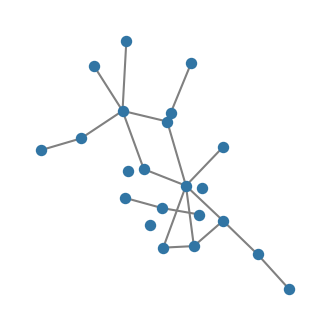

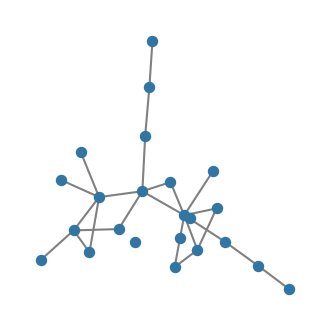

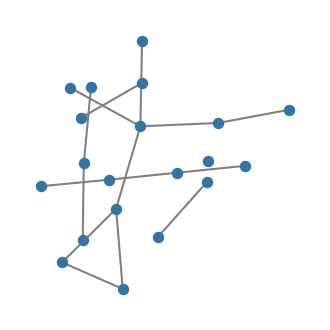

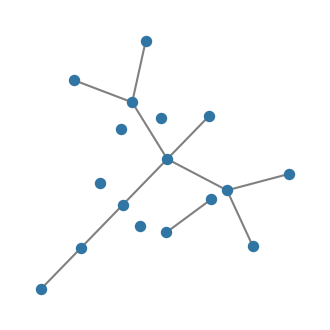

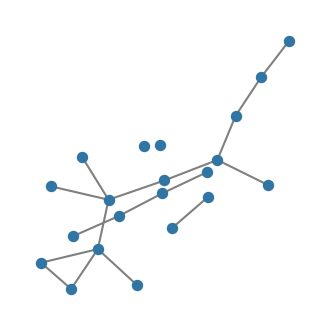

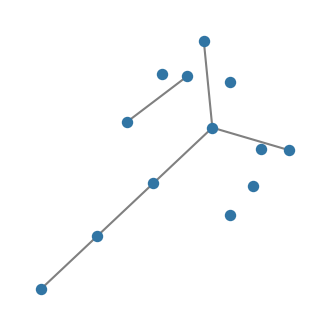

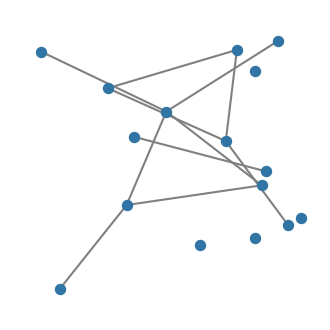

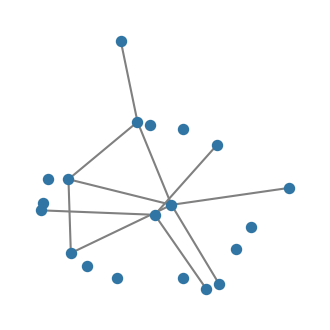

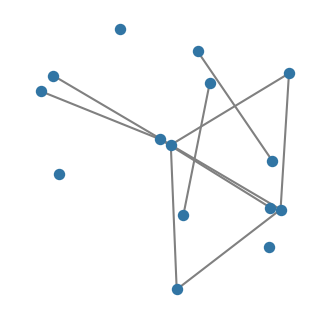

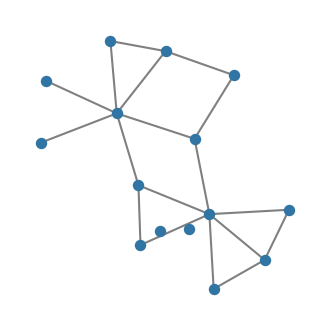

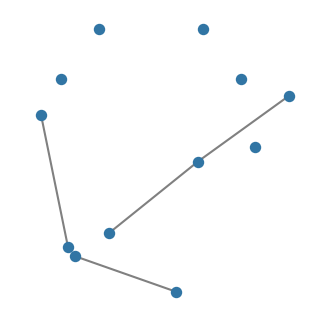

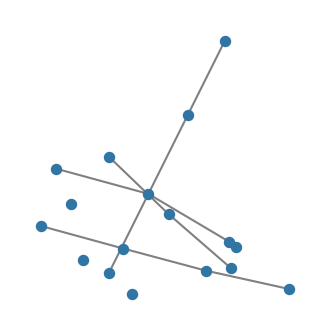

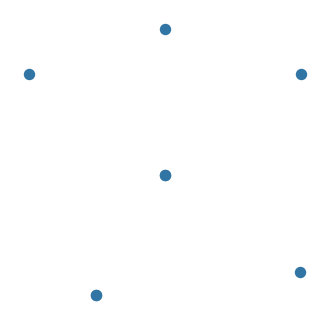

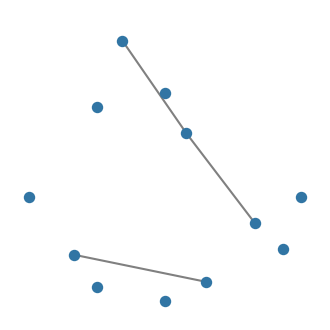

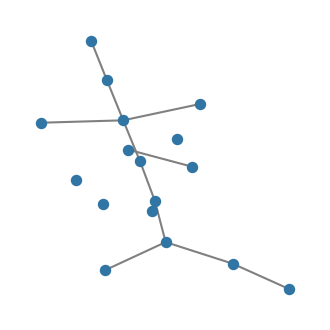

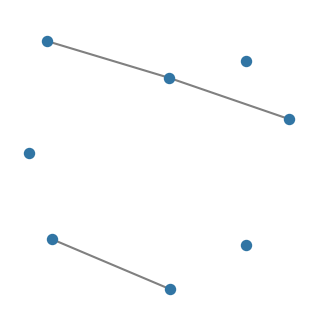

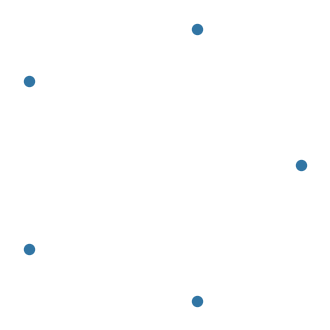

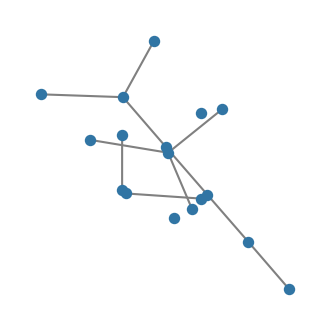

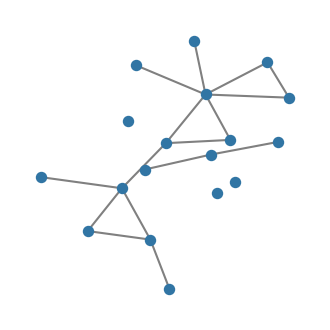

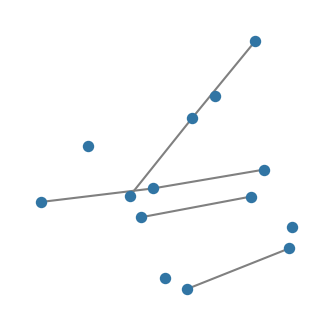

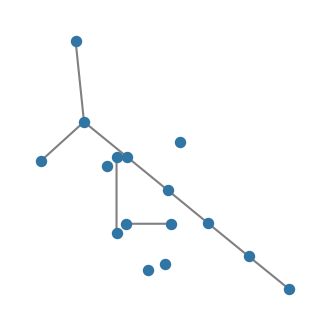

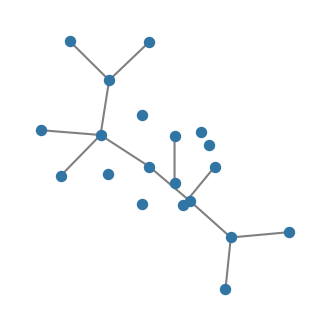

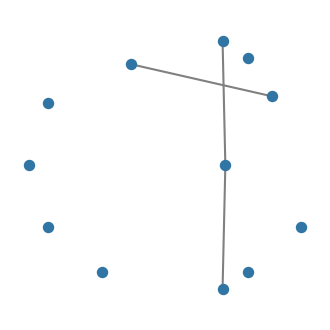

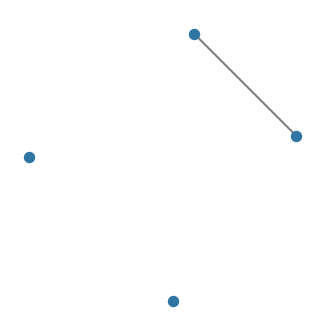

In [146]:
## 某个组织上显著表达的基因组成的子图
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx", sheet_name="corelcczscore-tissue")
results_sorted = results.sort_values(by = "fisher's pvalue") # 将组织按照与性状的相关性排序
tissue_list = list(results_sorted["tissue"])
for tissue in tissue_list:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv" % tissue,index_col=0)
    signi_genes = list(df[df["P-Value"]<0.005]["Column"])
    print(tissue)
    viewNx1(signi_genes,tissue)

In [33]:
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx", sheet_name="corelcczscore-tissue")
results_sorted = results.sort_values(by = "fisher's pvalue") # 将组织按照与性状的相关性排序
tissue_list = list(results_sorted["tissue"])
lcc_list = []
for tissue in tissue_list:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv" % tissue,index_col=0)
    signi_genes = list(df[df["P-Value"]<0.005]["Column"])
    lcc = Lcc(G,signi_genes)
    lcc_list.append(lcc)

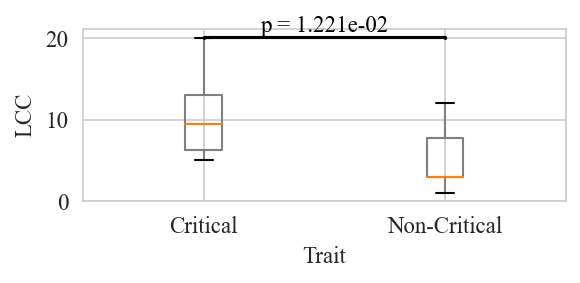

In [34]:
# 箱线图
plt.figure(figsize=(4, 2),dpi = 150)
box = plt.boxplot([lcc_list[0:10],lcc_list[10:]], boxprops=dict(color='grey'), whiskerprops=dict(color='grey'))

from scipy.stats import mannwhitneyu
# 计算 p 值
stat, p_value = mannwhitneyu(lcc_list[0:10], lcc_list[10:], alternative='two-sided')
# t_stat, p_value = ttest_ind(ttlist, tNotlist)
# 在箱体之间添加标示线和 p 值
x1, x2 = 1, 2
y, h, col = max(max(lcc_list[0:10]), max(lcc_list[10:])) + 0.05, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, f"p = {p_value:.3e}", ha='center', va='bottom', color=col)
plt.yticks([0,10,20])
plt.ylabel("LCC")
# 设置自定义横轴坐标值和标签
custom_ticks = [1, 2]  # 自定义的横轴坐标值 
custom_labels = ["Critical", "Non-Critical"]  # 对应的标签
plt.xticks(custom_ticks, custom_labels)
plt.xlabel("Trait")
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-en\30.png",dpi=500)
plt.show()

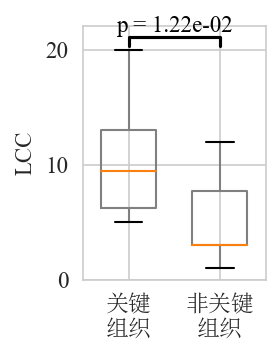

In [53]:
# 箱线图
plt.figure(figsize=(2,2.5),dpi = 150)
box = plt.boxplot([lcc_list[0:10],lcc_list[10:]], boxprops=dict(color='grey'), whiskerprops=dict(color='grey'),widths=0.6)
plt.rcParams['font.size'] = 11  # 设置全局字体大小
from scipy.stats import mannwhitneyu
# 计算 p 值
stat, p_value = mannwhitneyu(lcc_list[0:10], lcc_list[10:], alternative='two-sided')
# t_stat, p_value = ttest_ind(ttlist, tNotlist)
# ---- 控制线和 p 值显示 ----
x1, x2 = 1, 2
y_max = max(max(lcc_list[0:10]), max(lcc_list[10:]))  # 获取最大值
offset = 0.3  # 比原先高出一点，控制上移
h = 0.8  # 线的高度

# 绘制线条和 p 值
plt.plot([x1, x1, x2, x2], [y_max + offset, y_max + offset + h, y_max + offset + h, y_max + offset], lw=1.5, c='k')
plt.text((x1 + x2) * 0.5, y_max + offset + h + 0.01, f"p = {p_value:.2e}", ha='center', va='bottom', color='k', fontsize=11)

plt.yticks([0,10,20])
plt.ylabel("LCC")
# 设置自定义横轴坐标值和标签
custom_ticks = [1, 2]  # 自定义的横轴坐标值 
custom_labels = ["关键\n组织", "非关键\n组织"]  # 对应的标签
plt.xticks(custom_ticks, custom_labels)

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\30-1.png",dpi=1000)
plt.show()

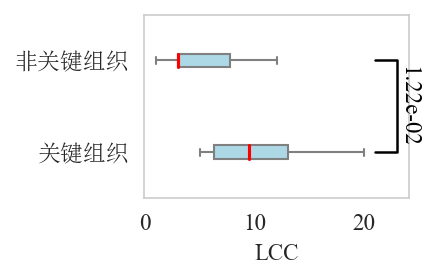

In [174]:
# 创建横向箱线图
plt.figure(figsize=(3, 2), dpi=150)

box = plt.boxplot(
    [lcc_list[0:10], lcc_list[10:]],
    patch_artist=True,  # 使箱体填充颜色
    vert=False,  # 横向箱线图
    boxprops=dict(facecolor="lightblue", color="grey"),  # 箱体颜色
    whiskerprops=dict(color="grey"),  # 触须颜色
    capprops=dict(color="grey"),  # 端点线颜色
    medianprops=dict(color="red", linewidth=1.5),  # 中位数线
    flierprops=dict(marker='o', color='grey', alpha=0.5, markersize=3)  # 异常值
)

# 计算 P 值
stat, p_value = mannwhitneyu(lcc_list[0:10], lcc_list[10:], alternative='two-sided')

# 在箱体之间添加 P 值标注
y1, y2 = 1, 2
x_max = max(max(lcc_list[0:10]), max(lcc_list[10:])) + 1  # 计算最大值
h = 2  # P 值标注线的高度
plt.plot([x_max, x_max + h, x_max + h, x_max], [y1, y1, y2, y2], lw=1.2, c="black")
plt.annotate(f"{p_value:.2e}", xy=(x_max + h, (y1 + y2) / 2), 
             ha="left", va="center", color="black",rotation=270)

# 设置 Y 轴标签（分类名称）
custom_labels = ["关键组织", "非关键组织"]
plt.yticks([1, 2], custom_labels, fontsize=11)

# 设置 X 轴标题
plt.xlabel("LCC", fontsize=11)

# 取消网格线
plt.grid(False)

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig(r"E:\00_CeSOP\plot\figures\30.png", dpi=1000)

# 显示图像
plt.show()

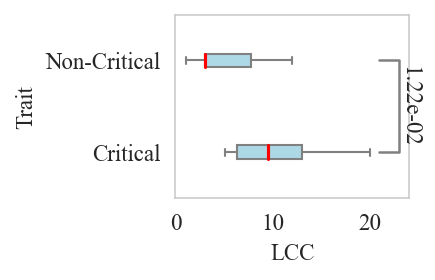

In [35]:
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx", sheet_name="corelcczscore-tissue")
results_sorted = results.sort_values(by = "fisher's pvalue") # 将组织按照与性状的相关性排序
tissue_list = list(results_sorted["tissue"])
lcc_list = []
for tissue in tissue_list:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv" % tissue,index_col=0)
    signi_genes = list(df[df["P-Value"]<0.005]["Column"])
    lcc = Lcc(G,signi_genes)
    lcc_list.append(lcc)


group1 = np.array(lcc_list[0:10])
group2 = np.array(lcc_list[10:])

plt.figure(figsize=(3, 2), dpi=150)

box = plt.boxplot(
    [group1, group2],
    patch_artist=True,
    vert=False,
    boxprops=dict(facecolor="lightblue", color="grey"),
    whiskerprops=dict(color="grey"),
    capprops=dict(color="grey"),
    medianprops=dict(color="red", linewidth=1.5),
    flierprops=dict(marker='o', color='grey', alpha=0.5, markersize=3)
)

# # 创建横向箱线图
# plt.figure(figsize=(3, 2), dpi=150)
# 
# box = plt.boxplot(
#     [lcc_list[0:10], lcc_list[10:]],
#     patch_artist=True,  # 使箱体填充颜色
#     vert=False,  # 横向箱线图
#     boxprops=dict(facecolor="lightblue", color="grey"),  # 箱体颜色
#     whiskerprops=dict(color="grey"),  # 触须颜色
#     capprops=dict(color="grey"),  # 端点线颜色
#     medianprops=dict(color="red", linewidth=1.5),  # 中位数线
#     flierprops=dict(marker='o', color='grey', alpha=0.5, markersize=3)  # 异常值
# )

# 计算 P 值
stat, p_value = mannwhitneyu(lcc_list[0:10], lcc_list[10:], alternative='two-sided')

# 在箱体之间添加 P 值标注
y1, y2 = 1, 2
x_max = max(max(lcc_list[0:10]), max(lcc_list[10:])) + 1  # 计算最大值
h = 2  # P 值标注线的高度
plt.plot([x_max, x_max + h, x_max + h, x_max], [y1, y1, y2, y2], lw=1.2,c="grey")
plt.annotate(f"{p_value:.2e}", xy=(x_max + h, (y1 + y2) / 2), 
             ha="left", va="center",rotation=270)

# 设置 Y 轴标签（分类名称）
custom_labels = ["Critical", "Non-Critical"]  # 对应的标签
plt.yticks([1, 2], custom_labels, fontsize=11)

# 设置 X 轴标题
plt.xlabel("LCC", fontsize=11)
plt.ylabel("Trait", fontsize=11)

# 取消网格线
plt.grid(False)

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig(r"E:\00_CeSOP\plot\figures-en\30.png", dpi=500)

# 显示图像
plt.show()